**Image Upscale with AI**

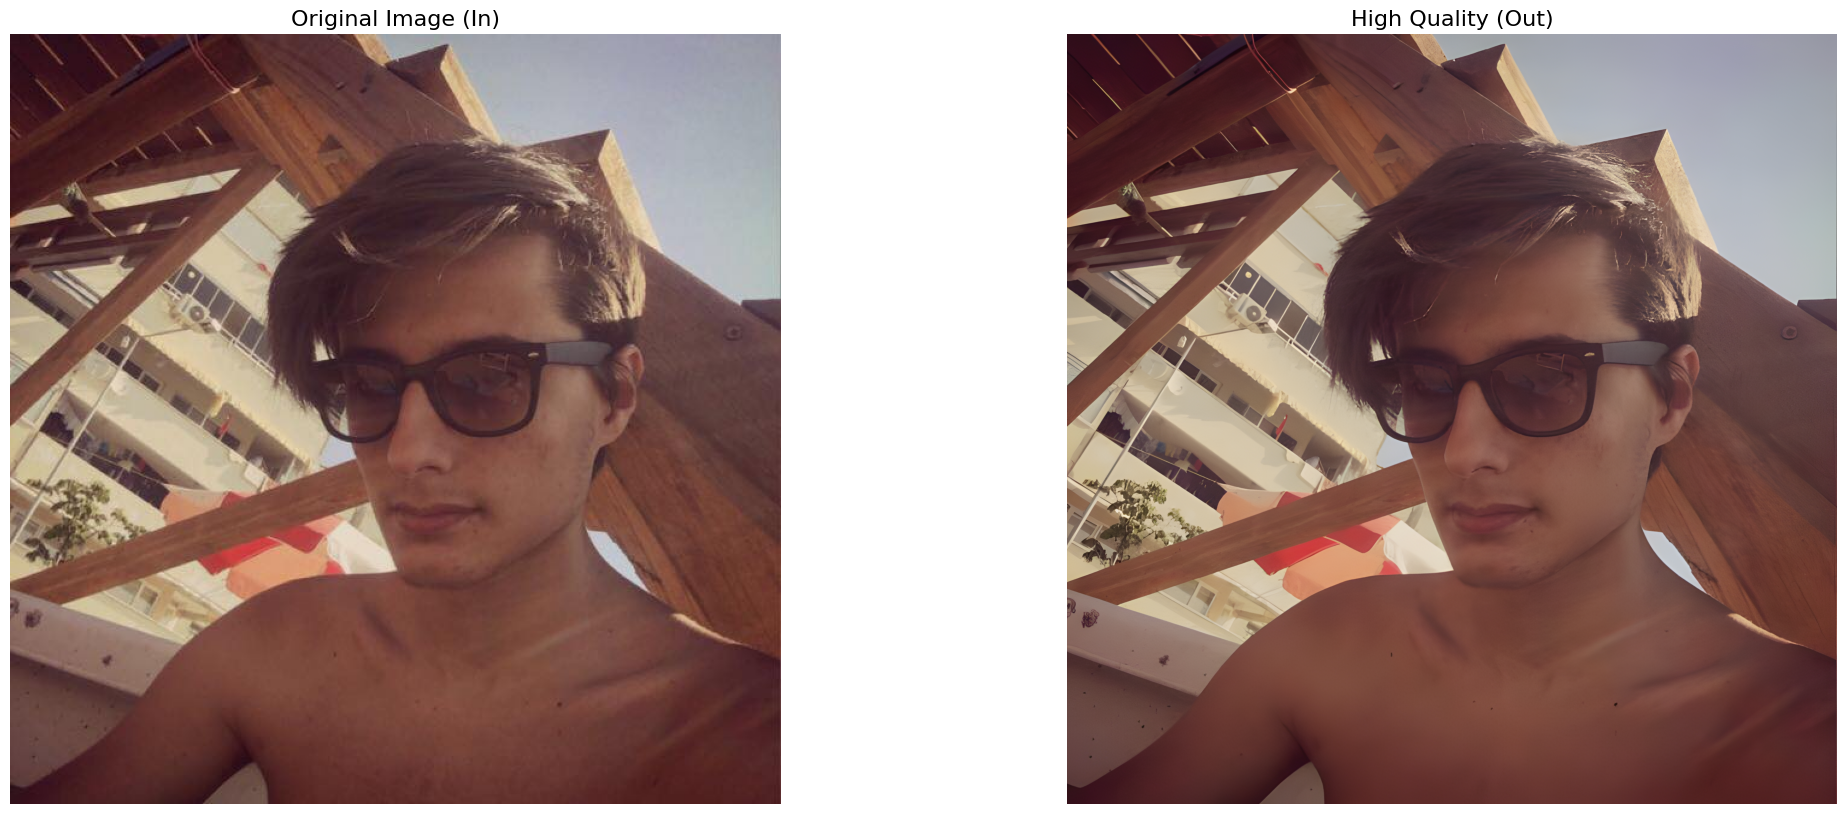

[GitHub URL](https://github.com/alicangnll/Img-Upscale-AI)

In [ ]:
#@title Download Other Modules
from IPython.display import clear_output
!pip install numpy
!pip install opencv-python
!pip install Pillow
!pip install torch
!pip install torchvision
!pip install tqdm
!pip install gfpgan
!pip install basicsr
!pip install facexlib
!pip install huggingface-hub==0.25.2
clear_output()

In [ ]:
#@title Download Upscale Module
!rm -rf /content/Img-Upscale-AI
!rm -rf /content/RealESRGAN
!rm -rf /content/model
!git clone https://github.com/alicangnll/Img-Upscale-AI
!mv Img-Upscale-AI/model /content
!mv Img-Upscale-AI/RealESRGAN /content
!mv Img-Upscale-AI/pic/demo.png /content
!rm -rf Img-Upscale-AI
clear_output()

In [ ]:
#@title Load Modules
import torch
from IPython.display import Image as show
from PIL import Image
from io import BytesIO
from RealESRGAN import *
from google.colab import files
clear_output()

In [ ]:
#@title Input Picture
uploaded = files.upload()
input_pic = str(next(iter(uploaded)))
output = input_pic.split(".")
output_pic = output[0] + '-output.png'
anime = "False" #@param ["True", "False"]
if anime is True:
  model_link = 'model/RealESRGAN_x4plus_anime_6B.pth'
else:
  model_link = 'model/RealESRGAN_x4plus.pth'
scale = 4 #@param {type:"integer"}

In [ ]:
#@title Process and Save Image
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RealESRGAN(device, scale=scale, anime=anime)
model.load_weights(model_link)
image = Image.open(input_pic).convert('RGB')
sr_image = model.predict(image)
sr_image.save(output_pic)
print("Image exported to " + str(output_pic))

In [ ]:
#@title Display Image
show(output_pic)

In [ ]:
#@title Face Enchange (Testing)
output_face_enc = RealESRGAN.face_enchange(output_pic)
output_face_enc.save("face_enc_output.png")